In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load and preprocess data

In [2]:
cleaned_feat_df = pd.read_csv('data/feat_new.csv')

In [3]:
cleaned_feat_df.head()

,text,label,token_length,WTAG_NN,WTAG_NNS,WTAG_VBP,WTAG_JJ,WTAG_IN,WTAG_VBD,WTAG_VBN,...,WTAG_VB,WTAG_MD,WTAG_JJS,fk_score,flesh_score,ari_score,cl_score,gf_score,sentiment,WTAG_JJR
0,washington reuters head conservative republica...,0.0,457.0,169.0,60.0,29.0,74.0,3.0,24.0,14.0,...,8.0,5.0,2.0,182.083129,-429.181926,237.112998,21.641138,193.565864,0.0,NaN
1,washington reuters transgender people allowed ...,0.0,386.0,138.0,53.0,15.0,71.0,NaN,30.0,15.0,...,9.0,8.0,NaN,157.716425,-375.852927,203.978705,24.582591,170.565803,0.0,1.0
2,washington reuters special counsel investigati...,0.0,264.0,112.0,23.0,13.0,47.0,7.0,18.0,8.0,...,9.0,5.0,NaN,109.045152,-235.452273,141.149318,22.263333,117.115152,0.0,1.0
3,washington reuters trump campaign adviser geor...,0.0,233.0,87.0,27.0,7.0,49.0,6.0,26.0,3.0,...,3.0,2.0,NaN,98.778326,-214.835966,126.806910,23.693562,106.418884,0.0,NaN
4,seattle washington reuters president donald tr...,0.0,528.0,197.0,66.0,12.0,98.0,7.0,33.0,7.0,...,2.0,2.0,2.0,208.560606,-497.644091,271.195739,19.880530,221.654545,0.0,2.0


In [4]:
cleaned_feat_df.count()

text            44182
label           44898
token_length    44898
WTAG_NN         44147
WTAG_NNS        43830
WTAG_VBP        42824
WTAG_JJ         44030
WTAG_IN         38103
WTAG_VBD        43326
WTAG_VBN        40299
WTAG_CD         39463
WTAG_VBG        42220
WTAG_RB         41943
WTAG_VBZ        36814
WTAG_VB         38084
WTAG_MD         31630
WTAG_JJS        18427
fk_score        44898
flesh_score     44898
ari_score       44898
cl_score        44898
gf_score        44898
sentiment       44798
WTAG_JJR        15805
dtype: int64

In [5]:
# there were some rows not properly formated / has nonsensible values both in original "Fake.csv" dataset and after preprocessing
# so cleaning them
cleaned_feat_df = cleaned_feat_df[cleaned_feat_df.label.notna()]
cleaned_feat_df = cleaned_feat_df[cleaned_feat_df.text.notna()]
cleaned_feat_df.count()

text            44182
label           44182
token_length    44182
WTAG_NN         44147
WTAG_NNS        43830
WTAG_VBP        42824
WTAG_JJ         44030
WTAG_IN         38103
WTAG_VBD        43326
WTAG_VBN        40299
WTAG_CD         39463
WTAG_VBG        42220
WTAG_RB         41943
WTAG_VBZ        36814
WTAG_VB         38084
WTAG_MD         31630
WTAG_JJS        18427
fk_score        44182
flesh_score     44182
ari_score       44182
cl_score        44182
gf_score        44182
sentiment       44082
WTAG_JJR        15805
dtype: int64

In [6]:
cleaned_feat_df.groupby("label").count()

,text,token_length,WTAG_NN,WTAG_NNS,WTAG_VBP,WTAG_JJ,WTAG_IN,WTAG_VBD,WTAG_VBN,WTAG_CD,...,WTAG_VB,WTAG_MD,WTAG_JJS,fk_score,flesh_score,ari_score,cl_score,gf_score,sentiment,WTAG_JJR
label,,,,,,,,,,,,,,,,,,,,,
0.0,21416,21416,21416,21416,20838,21414,17504,21406,19417,18735,...,17907,15580,8699,21416,21416,21416,21416,21416,21416,7418
1.0,22766,22766,22731,22414,21986,22616,20599,21920,20882,20728,...,20177,16050,9728,22766,22766,22766,22766,22766,22666,8387


In [7]:
cleaned_feat_df.fillna(0, inplace=True)
temp_df = cleaned_feat_df.copy()

In [8]:
Y = temp_df[["label"]].astype(int)
temp_df.drop(['label', 'text'], inplace=True, axis=1)
X = temp_df.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Logistic regression model

In [9]:
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train, y_train.label)
logistic_predictions = logisticRegr.predict(X_test)
logistic_score = accuracy_score(y_test.label, logistic_predictions)

# Random Forest model

In [10]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train.label)
rf_predictions = rf_model.predict(X_test)
rf_score = accuracy_score(y_test.label, rf_predictions)

# SVM model

In [11]:
svm_model = SVC()
svm_model.fit(X_train, y_train.label)
svm_predictions = svm_model.predict(X_test)
svm_score = accuracy_score(y_test.label, svm_predictions)

In [12]:
# Compare and display results
print(f"Logistic Regression Accuracy: {logistic_score:.2f}")
print(f"Random Forest Accuracy: {rf_score:.2f}")
print(f"SVM Accuracy: {svm_score:.2f}")

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test.label, logistic_predictions))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test.label, rf_predictions))

print("\nSVM Classification Report:")
print(classification_report(y_test.label, svm_predictions))

Logistic Regression Accuracy: 0.80
Random Forest Accuracy: 0.89
SVM Accuracy: 0.78

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      4335
           1       0.82      0.78      0.80      4502

    accuracy                           0.80      8837
   macro avg       0.80      0.80      0.80      8837
weighted avg       0.80      0.80      0.80      8837


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4335
           1       0.88      0.90      0.89      4502

    accuracy                           0.89      8837
   macro avg       0.89      0.89      0.89      8837
weighted avg       0.89      0.89      0.89      8837


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      4335
           1       0.83      0.71      0.76 

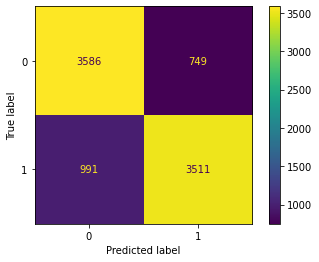

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test.label, logistic_predictions)
plt.show()

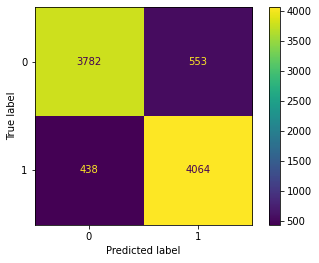

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test.label, rf_predictions)
plt.show()

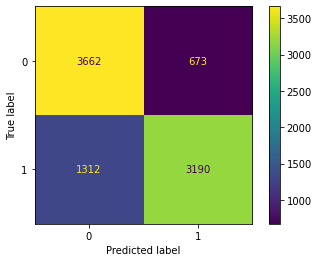

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test.label, svm_predictions)
plt.show()